In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

In [22]:
data = np.loadtxt('../data/regression_data.csv', delimiter=',', dtype=np.float64, skiprows=1)
X = data[:, :-1]
y = data[:, -1].reshape(-1, 1)

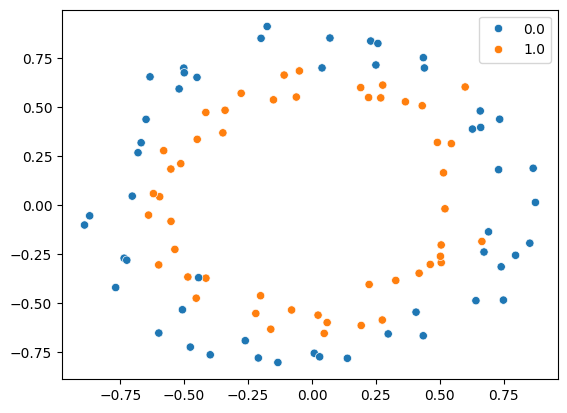

In [23]:
sns.scatterplot(x=X[:, 0], y=X[:,1], hue=y.flatten())

plt.show()

The sigmoid function

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

The cross entropy loss function

In [25]:
def loss(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    return -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y)

The gradient

In [26]:
def grad(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    return np.dot(X.T, (h - y)) / len(y)

The feature expansion

In [27]:
def expand_feature(x1, x2, power = 2):
    # Expand 2D feature matrix to polynomial features up to the given power
    new_x = np.ones((x1.shape[0], 1))
    for i in range(1, power + 1):
        for j in range(i + 1):
            new_x = np.append(new_x, (x1 ** (i - j) * (x2 ** j)).reshape(-1, 1), axis=1)
    
    return new_x

In [28]:
def predict(theta, X):
    prob = sigmoid(np.dot(X, theta))
    return (prob >= 0.5).flatten()

Gradient descent

In [29]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        theta -= alpha * np.dot(X.T, (h - y)) / m
        costs.append(loss(theta, X, y))

    return theta, costs

Implement logistics regression

In [30]:
def logistic_regression(X, y, power = 2,  alpha=0.01, iterations=100):
    X = expand_feature(X[:, 0], X[:, 1], power)
    theta = np.zeros((X.shape[1], 1), dtype=np.float64)
    theta, costs = gradient_descent(X, y, theta, alpha, iterations)
    predicted = predict(theta, X)
    return predicted, theta, costs

Decide the polinomical power in the futures, and the number of iterations

In [41]:
power = 10
iterations = 100000

predicted, theta, costs = logistic_regression(X, y, power=power, alpha=0.6, iterations=iterations)

In [42]:
print(f'Accuracy: {sum(predicted == y.flatten()) / len(y) * 100:.2f}%')

Accuracy: 97.00%


Visualize the classifier

/var/folders/fk/bvdcbq4j5lg7zmfsl1zhzmgh0000gn/T/ipykernel_16193/570981197.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(features, theta)


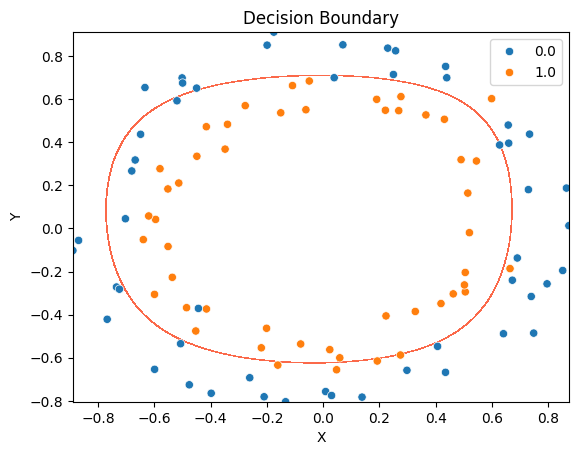

In [ ]:
u = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
v = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)

z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        features = expand_feature(u[i].reshape(1, -1), v[j].reshape(1, -1), power = power)
        z[i, j] = np.dot(features, theta).item()

plt.contourf(u, v, z, [0, 0.01], cmap= 'Reds')
sns.scatterplot(x=X[:, 0], y=X[:,1], hue=y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Regularization: cost function

In [34]:
def cost_reg(theta, X, y, lam = 0):
    
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()
    theta1[0] = 0  
    cost = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y) + lam * np.sum(theta1 * theta1) / len(y)
    return cost

Regularization: Gradient

In [35]:
def grad_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()
    theta1[0] = 0  
    gradient = (np.dot(X.T, (h - y)) + 2 * lam * theta1) / len(y)
    return gradient

Regularization: Gradient Descent

In [36]:
def gradient_descent_reg(X, y, theta, alpha, lam = 0, iterations = 100):
    costs = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        theta1 = theta.copy()
        theta1[0] = 0
        theta -= alpha * (np.dot(X.T, (h - y)) + 2 * lam * theta1) / len(y)
        costs.append(cost_reg(theta, X, y, lam))

    return theta, costs

Regularization: Logistic regression

In [37]:
def logistic_regression_reg(X, y, power = 2, alpha=0.01, lam=0, iterations=100):
    X = expand_feature(X[:, 0], X[:, 1], power)
    theta = np.zeros((X.shape[1], 1), dtype=np.float64)
    theta, costs = gradient_descent_reg(X, y, theta, alpha, lam, iterations)
    predicted = predict(theta, X)
    return predicted, theta, costs

Regularization: Decide the polinomial feature, number iterations, lambda

In [44]:
power = 10
iterations = 100000
lam = 1

predicted, theta, costs = logistic_regression_reg(X, y, power=power, alpha=0.6, lam=lam, iterations=iterations)

In [45]:
print(f'Accuracy: {sum(predicted == y.flatten()) / len(y) * 100:.2f}%')

Accuracy: 93.00%


Regularization: Visualize results

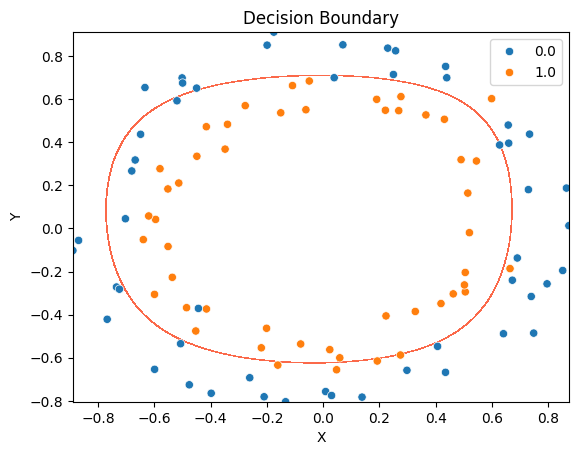

In [49]:
u = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
v = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)

z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        features = expand_feature(u[i].reshape(1, -1), v[j].reshape(1, -1), power = power)
        z[i, j] = np.dot(features, theta).item()

plt.contourf(u, v, z, [0, 0.01], cmap= 'Reds')
sns.scatterplot(x=X[:, 0], y=X[:,1], hue=y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()